# Explore here

TESTING LOADING AND EXPLORATION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# Load dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
diabetes = pd.read_csv(url)

# Initial exploration
print("Dataset shape:", diabetes.shape)
print("\nFirst 5 rows:")
display(diabetes.head())
print("\nData types and missing values:")
print(diabetes.info())
print("\nStatistical summary:")
display(diabetes.describe())
print("\nOutcome distribution:")
print(diabetes['Outcome'].value_counts(normalize=True))

Dataset shape: (768, 9)

First 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Statistical summary:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



Outcome distribution:
Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


EDA

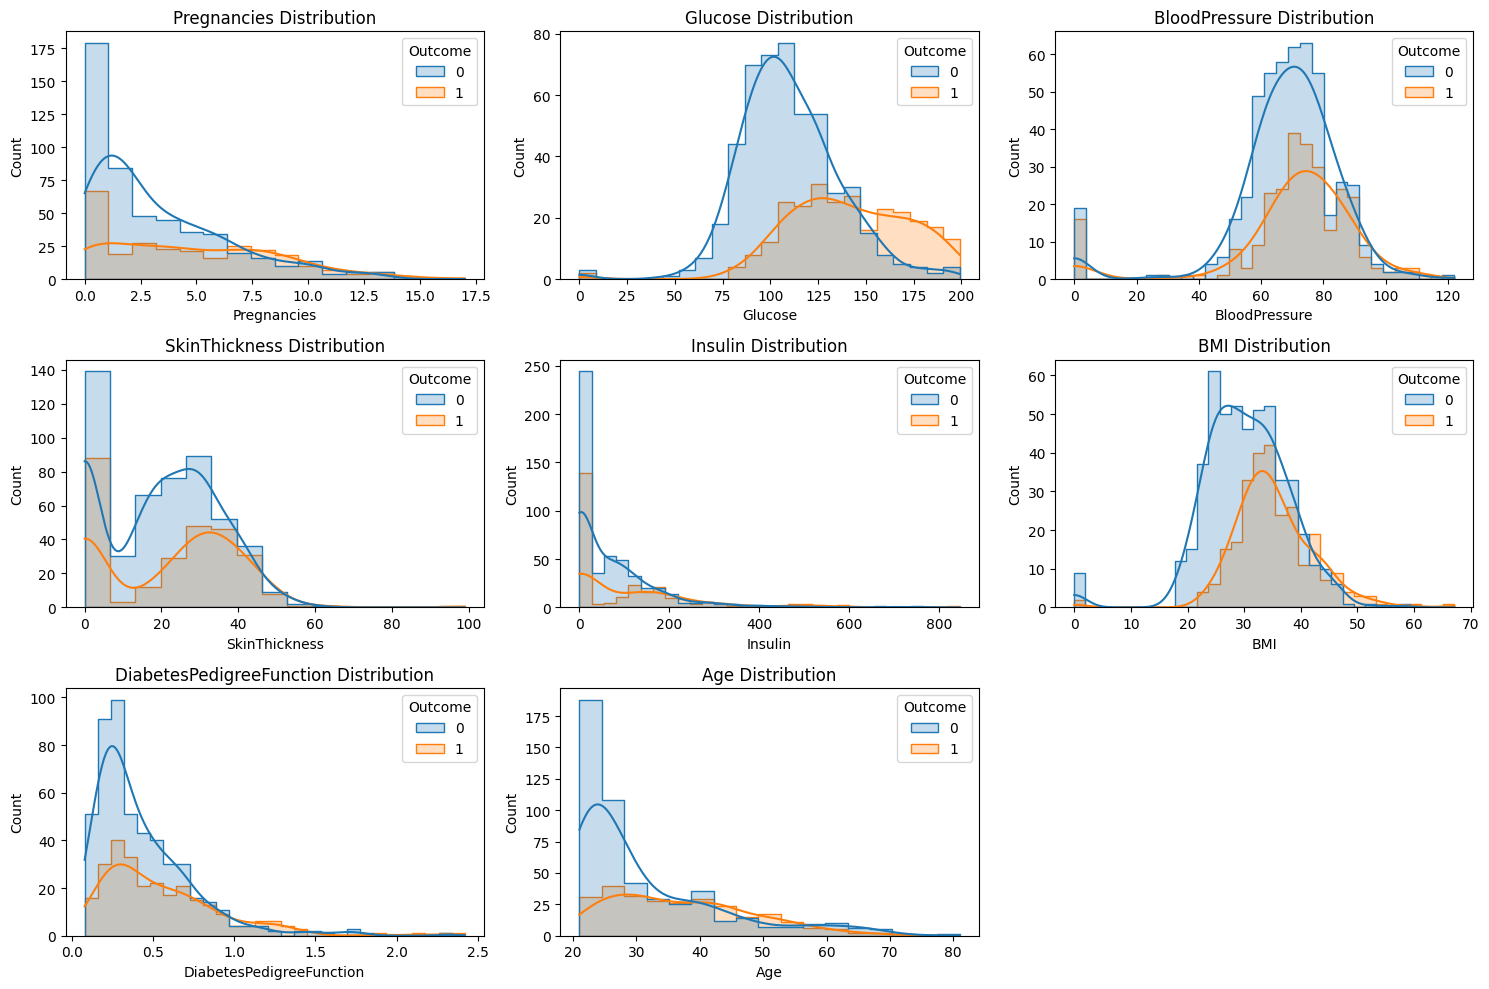


Zero value counts:
Glucose: 5 zeros (0.65%)
BloodPressure: 35 zeros (4.56%)
SkinThickness: 227 zeros (29.56%)
Insulin: 374 zeros (48.70%)
BMI: 11 zeros (1.43%)


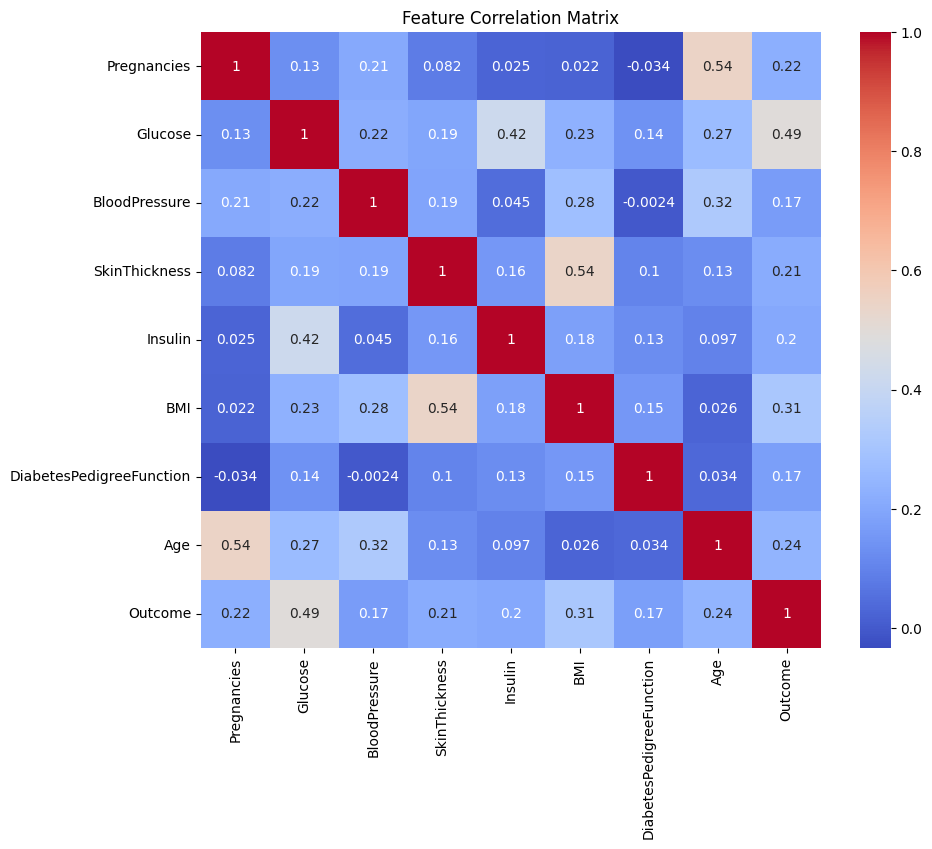

In [3]:
# Visualize distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(diabetes.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=diabetes, x=col, hue='Outcome', kde=True, element='step')
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

# Check for impossible zero values
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("\nZero value counts:")
for col in zero_columns:
    zero_count = (diabetes[col] == 0).sum()
    print(f"{col}: {zero_count} zeros ({zero_count/len(diabetes)*100:.2f}%)")

# Handle zero values by imputing with median
diabetes_clean = diabetes.copy()
for col in zero_columns:
    median_val = diabetes_clean[diabetes_clean[col] != 0][col].median()
    diabetes_clean[col] = diabetes_clean[col].replace(0, median_val)

# Correlation analysis
plt.figure(figsize=(10, 8))
corr_matrix = diabetes_clean.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

Train Test Split

In [4]:
# Prepare data
X = diabetes_clean.drop('Outcome', axis=1)
y = diabetes_clean['Outcome']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Maintain class distribution
)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Training set: 614 samples
Test set: 154 samples


Decision Tree Model test

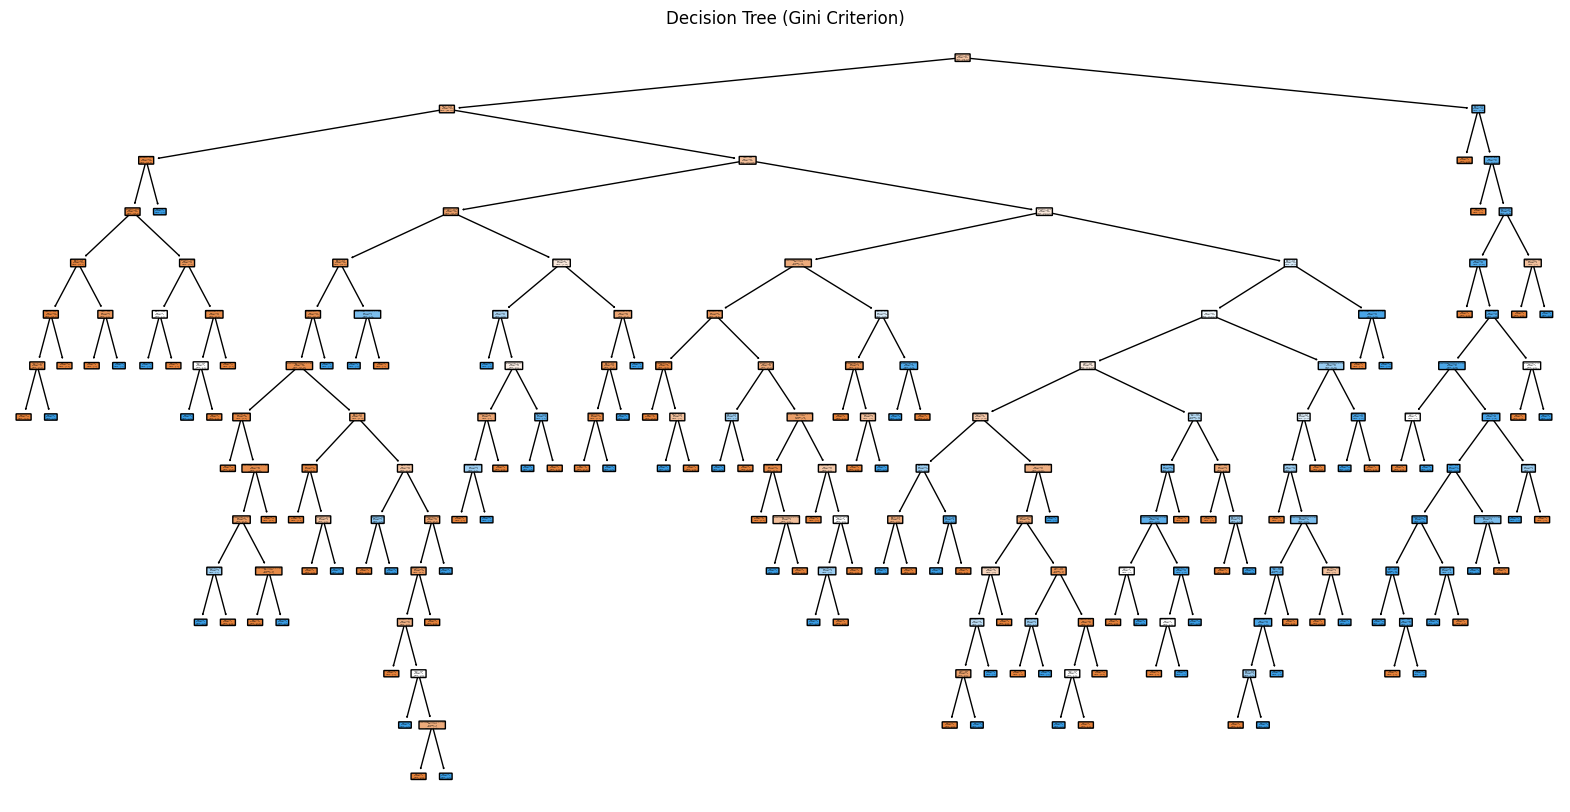

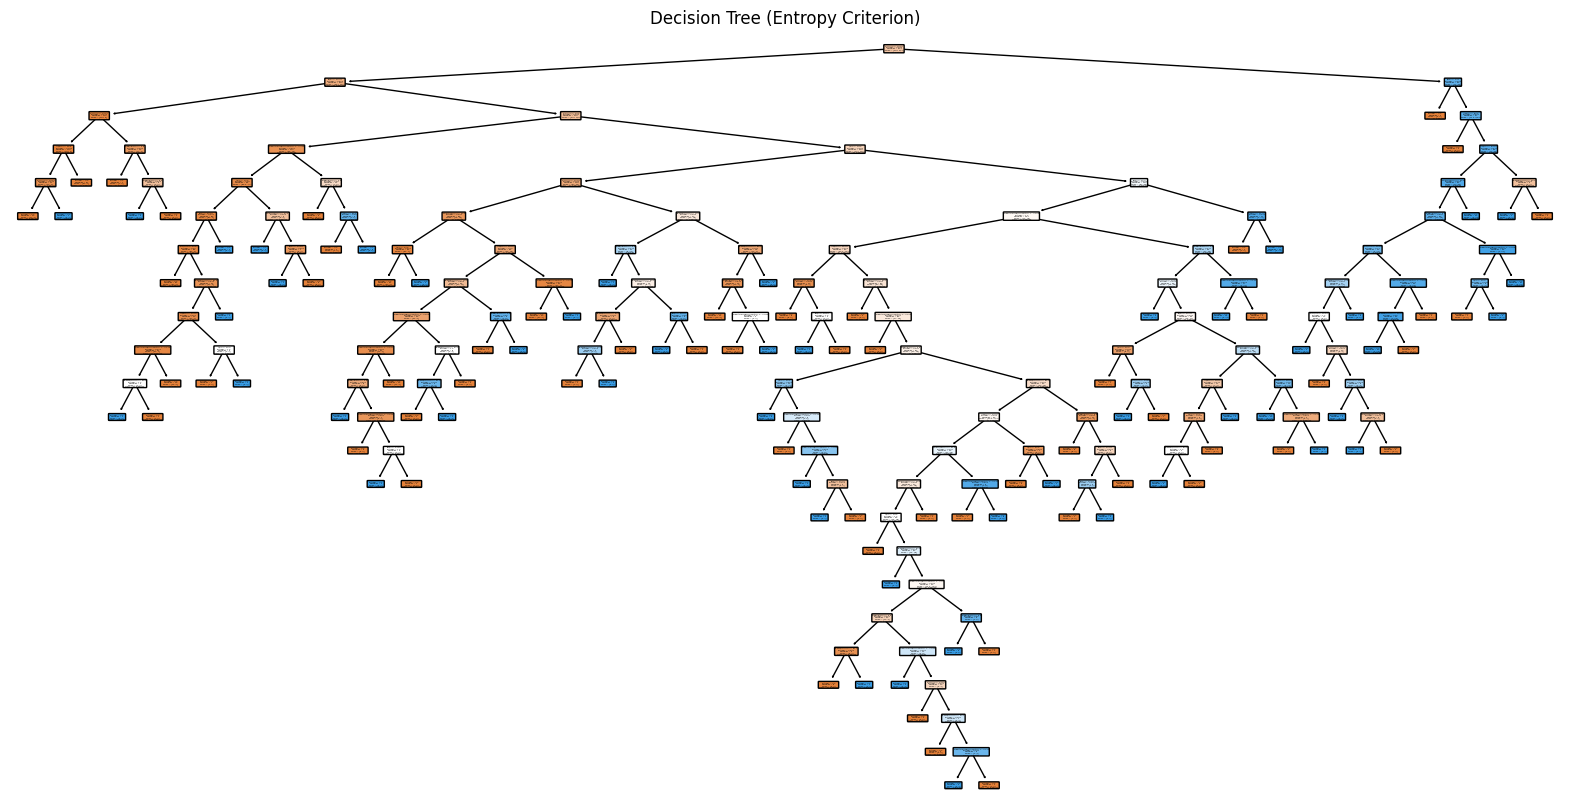


Model Comparison:

Gini Criterion:
Accuracy: 0.6818
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       100
           1       0.55      0.48      0.51        54

    accuracy                           0.68       154
   macro avg       0.65      0.64      0.64       154
weighted avg       0.67      0.68      0.68       154


Entropy Criterion:
Accuracy: 0.6753
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       100
           1       0.54      0.52      0.53        54

    accuracy                           0.68       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.68      0.67       154



In [5]:
# Build and compare models with different purity criteria
criteria = ['gini', 'entropy']
results = {}

for criterion in criteria:
    # Create and train model
    model = DecisionTreeClassifier(
        criterion=criterion,
        random_state=42
    )
    model.fit(X_train, y_train)
    
    # Evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[criterion] = {
        'model': model,
        'accuracy': accuracy,
        'report': classification_report(y_test, y_pred)
    }
    
    # Visualize tree
    plt.figure(figsize=(20, 10))
    plot_tree(
        model, 
        feature_names=X.columns, 
        class_names=['No Diabetes', 'Diabetes'],
        filled=True,
        rounded=True
    )
    plt.title(f'Decision Tree ({criterion.capitalize()} Criterion)')
    plt.show()

# Compare results
print("\nModel Comparison:")
for criterion, data in results.items():
    print(f"\n{criterion.capitalize()} Criterion:")
    print(f"Accuracy: {data['accuracy']:.4f}")
    print("Classification Report:")
    print(data['report'])